<a href="https://colab.research.google.com/github/Tohskcid/Measuring-Treatment-Effects-with-Causal-Machine-Learning-Techniques----Final-Project/blob/main/ibm_is_shrek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Measuring Treatment Effects with Causal Machine Learning Techniques -- Final Project

*   Team Members: 李信哲(B08607043), 陳毓文(R13B44010)
*   Data Source: "Telco customer churn: IBM dataset" from [Kaggle](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset).
*   Reference:

    1.   ChatGPT(life saver)
    2.   [Kaggle code section](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset/code)
    3. [Kaggle 競賽攻頂秘笈 - 揭開 Grandmaster 的特徵工程心法，掌握制勝的關鍵技術](https://www.books.com.tw/products/0010883417?srsltid=AfmBOopea_eWKrPXMQ6lAzFQcxKrmo-TrvFIPCsxQWC7u5qu6bSSgbY3)
    4. [Customer Churn Prediction in Telecommunication
A Decade Review and Classification
](https://www.researchgate.net/profile/Nabgha-Hashmi/publication/257920014_Customer_Churn_Prediction_in_Telecommunication_A_Decade_Review_and_Classification/links/00b495261475ba6758000000/Customer-Churn-Prediction-in-Telecommunication-A-Decade-Review-and-Classification.pdf)
    5. [Churn rate prediction in Telecommunication systems
](https://ir.vistas.ac.in/id/eprint/8886/)
    6. [Why you should stop predicting customer churn and start using uplift models](https://www.sciencedirect.com/science/article/pii/S0020025519312022)
    7. [Customer churn prediction in telecom sector using machine learning techniques ](https://www.sciencedirect.com/science/article/pii/S2666720723001443)

# *Shrek is Love*
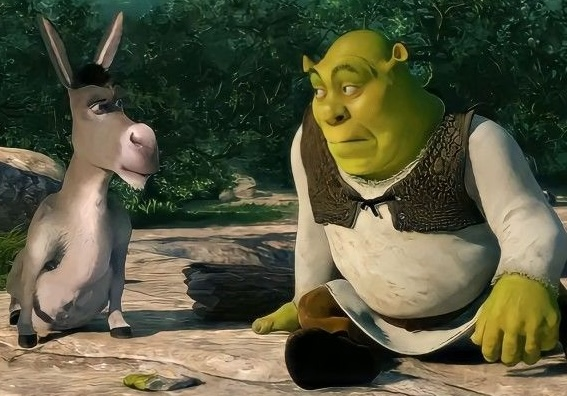

# Abstract
We use Telco customer churn: IBM dataset find out key factors that lead to the churn of an customer. We also propose three strategies to retain customers.  

# 1.Introduction and Research Reviews


---
## Background
Network survice providers in the US are dominated by top 3 Telcoms, including Verizon(37%), T-Mobile(32%), and AT%T(29%) in 2024Q1 according to [statista](https://www.statista.com/statistics/199359/market-share-of-wireless-carriers-in-the-us-by-subscriptions/). The top 3 Telcoms nearly corner the whole market. Also the the net profit marigin of the top 3 are respctively  7.30%, 10.54%, and 7.42% in 2024Q3, which are very close. Threfore, the relationship among the top 3 can be described as  monopolistic competition, which means the top 3 provide homogeneous products, service and earn resonable profits in this market structure.

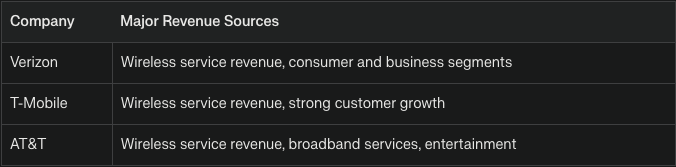


To stay competitive, customers churn rate is one of the biggest issues for Telcom in making business decisions. It is directly related to strategies for managers and sales on site ([ref. ](https://www2.deloitte.com/tw/tc/pages/technology/articles/newsletter-12-32.html)). Therefore, our goal to make as simple as possible, which is to find out key factors in predicting churn of an customer.

# About this research
Our project consits of 5 main parts, which is 1. Introduction and Research Reviews., 2. Data Exploring, 3. Feature Engineering, 4. Models and Accuracy, and 5.Solusions Discussion, and Conclusion.
We start from exploring data, hoping to find out the connection among features, then we do feature engineering. The two parts are the most important parts in Our Analysis. Next step, we hand on analysis using models including logistic regression, Multilayer Perceptron(MLP) and Gradient Boosting Decision Tree. In the last section, we propose three different stratgies use uplift model to test if our strategies work,which focus on promotions on customers with Month-to-month contract, customers who use fiber optice as their internet service and customers who simply got charged high.

# Research reviews
In the past two decades, there are many articles about churn rate prediction. According to "Customer Churn Prediction in Telecommunication A Decade Review and Classification", in 2013, by Hashmi et al., more than half of articles use decision tree, neural networks   and logistic regression. In "Why you should stop predicting customer churn and start using uplift models", 2021 by Devriendt et al. observed uplift models outperform other predictive models about retention campaigns. in their studies. Therefore in section 4, we will compare logistic regression, neural networks(MLP), and decision tree(GBDT). Besides, we will use uplift models to propose feasible strategies to help the company focus retaining its customers .



### Import Packages

In [41]:
!pip install scikit-uplift


In [42]:
# =======================
# 1. Data Processing and Manipulation
# =======================
import os  # For operating system-related tasks
import numpy as np  # For numerical calculations
import pandas as pd  # For data manipulation and analysis

# =======================
# 2. Data Visualization
# =======================
import matplotlib.pyplot as plt  # For static 2D plotting
import seaborn as sns  # For advanced statistical data visualization
import plotly.express as px  # For interactive visualizations

# =======================
# 3. Machine Learning and Statistical Modeling
# =======================
# Regression Models
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Classification Models
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Clustering
from sklearn.neighbors import KNeighborsClassifier

# Evaluation and Scoring
from sklearn.metrics import (
    mean_squared_error,
    accuracy_score,
    classification_report,
    confusion_matrix,
    silhouette_score,
)

# Model Training and Testing
from sklearn.model_selection import train_test_split, cross_val_score

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Neural Networks
from sklearn.neural_network import MLPClassifier

# Statistical Modeling
import statsmodels.api as sm  # For advanced statistical analysis
import statsmodels.formula.api as smf  # For formula-based statistical modeling

# Uplift Modeling
import sklift
from sklift.models import TwoModels

# =======================
# 4. Geographical Calculations
# =======================
from math import radians, cos, sin, asin, sqrt  # For geospatial distance calculations

# =======================
# 5. Visualization Utilities
# =======================
from sklearn.tree import plot_tree  # For decision tree visualization

### Import Data

In [43]:
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')
if 'Telco_customer_churn.xlsx' in os.listdir():  # show if our data in drive
  print('True')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
True


In [44]:
df = pd.read_excel("/content/drive/My Drive/Telco_customer_churn.xlsx")
var = df.columns

print(var)
df


Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


We dropped some unuseful columns so we can focus on the rest of the variables.

1. CustomerID: There is a unique value for each customer, adds no information
2. Country and State: all rows have same value
3. Lat Long: adds no information cause there is a seperate column for each of them
4. Churn Label: same information are given by Churn value
Count: there is only one value in the column, all rows have the same value, adds no information
5. Churn Reason: given only for churned customers, can't be used for prediction.
6. Churn Score: indicative of churn, would be target variable for a regression Model. We  also find out the prediction performance will increase a lot by adding this term, therefore we consider this term as data leakage situation.

In [45]:
drop_columns =  ['CustomerID', 'Count', 'Country', 'State', 'Lat Long', 'Churn Label','Churn Reason', 'Churn Score']
df.drop(drop_columns , axis=1, inplace=True)
df

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,5372
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,Yes,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0,5306
7039,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,2140
7040,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,5560
7041,Angelus Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,2793


### Helper Functions
Helper functions are functions we built and brought from website, which help us maintain clean and readable program.  

In [46]:
# Drawing pie chart
def plot_target(df , column_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(8,4))
    normalized_counts = df[column_name].value_counts(normalize=True)
    palette = sns.color_palette(["#4682b4", "#ff8c00"])
    ax = sns.countplot(df, x = column_name, hue = column_name, ax = ax1, palette=palette)
    colors = [palette[i] for i in range(len(df[column_name].unique()))]
    Gender_df = pd.DataFrame(df[column_name].value_counts())
    ax2.pie(Gender_df['count'], labels=Gender_df.index,autopct='%1.1f%%',colors=colors)
    ax2.set_aspect('equal')

In [47]:
# Haversine function help us find the ditance between two observations
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius. Unit: kilometer
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))

    return R * c


In [48]:
# Start by checking unique value in each of the categorical columns
def display_unique_values(dataframe):
    # Iterate over each column in the DataFrame
    list_object = []
    index = 0
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            unique_values = dataframe[column].unique()
            print(f"Unique values in column '{column}': {', '.join(unique_values)}")
            list_object.append(index)
            index += 1

    return list_object



In [49]:
def plot_count_plots(df, variable, target_variable, rotation=0):
    plt.figure(figsize=(10, 4))
    unique_classes = df[variable].nunique()
    unique_classes_sort = df[variable].unique()
    palette2 = sns.color_palette(["#4682b4", "#ff8c00", "#8fbc8f", "#ffff00"], unique_classes)

    # Plot count plot normalized for the variable itself
    plt.subplot(1, 2, 1)
    sns.countplot(x=variable, hue=variable, data=df, order=df[variable].value_counts().index, hue_order=sorted(unique_classes_sort), palette=palette2, saturation=0.75)
    plt.title(f'Count Plot Normalized for {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.xticks(rotation=rotation)

    # Add percentage above each bar
    total_count = len(df)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().annotate(f'{height / total_count:.1%}', (p.get_x() + p.get_width() / 2.,  height - 0.03 * height),
                           ha='center', va='bottom', fontsize=10, color='black',
                           xytext=(0, 5), textcoords='offset points')

    # Plot count plot normalized with the target as hue
    plt.subplot(1, 2, 2)
    palette3 = sns.color_palette(["#4682b4", "#ff8c00"])
    sns.countplot(x=variable, hue=target_variable, data=df, order=df[variable].value_counts().index, palette=palette3, saturation=0.75)
    plt.title(f'Count Plot Normalized with {target_variable} as Hue')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.xticks(rotation=rotation)

    # Add percentage above each bar
    total_count = len(df)
    for p in plt.gca().patches:
        height = p.get_height()
        if height > 0:
            y_offset = height - 0.03 * height if height > 0.1 else height + 0.05 * height
            plt.gca().annotate(f'{height / total_count:.1%}', (p.get_x() + p.get_width() / 2, height - 0.03 * height),
                           ha='center', va='bottom', fontsize = 10, color='black',
                           xytext=(0, 5), textcoords='offset points')

    plt.legend(title=target_variable)
    plt.tight_layout()
    plt.show()


In [50]:
def plot_numerical_variable(df, variable, target_variable):
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], kde=True, bins=20)
    plt.title('Histogram for {}'.format(variable))
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    palette3 = sns.color_palette(["#4682b4", "#ff8c00"])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=target_variable, y=variable, data = df, hue=target_variable, palette=palette3)
    plt.legend([], [], frameon=False)  # Remove legends
    plt.title('Box Plot of {} with {}'.format(variable, target_variable))
    plt.xlabel(target_variable)
    plt.ylabel(variable)

    plt.tight_layout()
    plt.show()

In [51]:
def plot_boxplot(df,x,y):
    plt.figure(figsize=(5, 4))
    sns.boxplot(x=x, y=y, data=df)
    plt.title('Box Plot of Total Charges with Internet Service')
    plt.xlabel('Internet Service')
    plt.ylabel('Total Charges')
    plt.show()

In [52]:
def plot_churn_ratio(df, target_column, cat_column):
    # Calculate the count and ratio
    count_data = df.groupby([target_column, cat_column]).size().reset_index(name='Count')
    total_data = df.groupby(target_column).size().reset_index(name='Total')
    count_data = count_data.merge(total_data, on=target_column)
    count_data['Ratio'] = count_data['Count'] / count_data['Total'] * 100

    # Plot the normalized ratio
    plt.figure(figsize=(6, 5))
    ax = sns.barplot(data=count_data, x=target_column, y='Ratio', hue=cat_column)
    plt.xlabel(target_column)
    plt.ylabel('Churn Ratio (%)')
    plt.title(f'Churn Ratio by {cat_column}')

    # Add percentages as labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            y_offset = height - 0.03 * height if height > 0.1 else height + 0.05 * height
            ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height - 0.03 * height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

In [53]:
def uplift_and_qini(y_true, uplift_scores, treatment_group, treatment):
    """
    Draw Uplift Curve and Qini Curve, and then calculate AUC and Qini Value.

    Args:
        y_true (array): True label of the samples (0 or 1)
        uplift_scores (array): The uplift score predicted from model
        treatment_group (array): Treatment label of the samples (1: treated group, 0: control group)
        treatment (str): The name of the treatment
    """
    # Ensure the inputs are numpy arrays
    y_true = np.array(y_true)
    uplift_scores = np.array(uplift_scores)
    treatment_group = np.array(treatment_group)

    # Sort samples by uplift_scores (descending order)
    sorted_indices = np.argsort(-uplift_scores)
    y_true = y_true[sorted_indices]
    treatment_group = treatment_group[sorted_indices]

    # Cumulative calculations
    cum_treated = np.cumsum(treatment_group)  # Cumulative number of treated samples
    cum_control = np.cumsum(1 - treatment_group)  # Cumulative number of control samples

    cum_treated_outcome = np.cumsum(y_true * treatment_group)  # Cumulative positive outcomes in treated group
    cum_control_outcome = np.cumsum(y_true * (1 - treatment_group))  # Cumulative positive outcomes in control group

    # Avoid division by zero, calculate average positive rate for each group
    treated_rate = cum_treated_outcome / np.maximum(cum_treated, 1)
    control_rate = cum_control_outcome / np.maximum(cum_control, 1)

    # uplift = (Average positive rate in treated group - Average positive rate in control group)
    uplift = treated_rate - control_rate

    # Qini curve: Gain calculation
    cumulative_uplift = cum_treated_outcome - (cum_treated * cum_control_outcome / np.maximum(cum_control, 1))

    # Plot curves
    plt.figure(figsize=(12, 6))

    # Plot Uplift Curve
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(uplift)) / len(uplift), uplift, label="Uplift Curve")
    plt.xlabel("Proportion of Population")
    plt.ylabel("Uplift")
    plt.title(f"Uplift Curve ({treatment})")
    plt.legend()
    plt.grid()

    # Plot Qini Curve
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(len(cumulative_uplift)) / len(cumulative_uplift), cumulative_uplift, label="Qini Curve")
    plt.xlabel("Proportion of Population")
    plt.ylabel("Cumulative Uplift")
    plt.title(f"Qini Curve ({treatment})")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

    # Calculate AUC (Uplift AUC)
    uplift_auc = np.trapz(uplift, dx=1 / len(uplift))

    # Calculate Qini Value
    qini_value = cumulative_uplift[-1]

    print(f"Uplift AUC: {uplift_auc:.4f}")
    print(f"Qini Value: {qini_value:.4f}")



# 2.Data Exploring

Data exploring help us investigate the connection between different variables.


## Labeling

In [54]:
print("data type of variables")
print(df.info())
print(" of variables")

print(df.describe())

data type of variables
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   object 
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  S

After reading the data description, we fonund that that total charges is considered a non-numerical column where it should contain numerical values. We also checked for missing value for all variables.



In [55]:
# Converting object to numeric and checking for null

df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
null_total_charges = df['Total Charges'].isnull().sum()
print("Number of null values in 'Total Charges' column:", null_total_charges)

Number of null values in 'Total Charges' column: 11


In [56]:
# Replacing null values in 'Total Charges' with Tenure Month * Monthly Charges

df['Replacement_Total_Charges'] = df['Tenure Months'] * df['Monthly Charges']
df['Total Charges'] = df['Total Charges'].fillna(df['Replacement_Total_Charges'])
df.drop(columns=['Replacement_Total_Charges'], inplace=True)

In [57]:
# Checking for null value
round(df.isnull().sum()/len(df),4)*100

,0
City,0.0
Zip Code,0.0
Latitude,0.0
Longitude,0.0
Gender,0.0
Senior Citizen,0.0
Partner,0.0
Dependents,0.0
Tenure Months,0.0
Phone Service,0.0


In [58]:
def get_column_types(df):
    categorical_cols = df.select_dtypes(include='object').columns
    numerical_cols = df.select_dtypes(include=['int', 'float']).columns
    print(f'There are {len(categorical_cols)} categorical variables')
    print(f'There are {len(numerical_cols)} numerical variables')
    return categorical_cols , numerical_cols

categorical_cols, numerical_cols = get_column_types(df)

There are 17 categorical variables
There are 8 numerical variables


## Churn Rate of the Customers

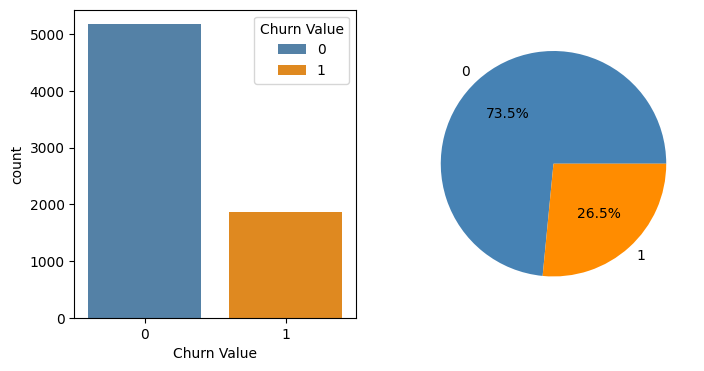

In [59]:
plot_target(df , 'Churn Value')

73.5% of the customers remained in the company while 26.5% of the customers left.

## Descriptive statistics for categorical variables.

There are some columns with "YES", "NO" and "No Service" at the same time. Since "NO" and "No Service" is referring to the same thing, we converted all "No Service" value to "NO".

In [60]:
# columns_to_convert = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Online Security']
columns_replace = ['Multiple Lines','Online Security','Online Backup',
                   'Device Protection','Tech Support','Streaming TV',
                   'Streaming Movies']

for i in columns_replace:
    df.loc[~df[i].isin(['No', 'Yes']), i] = 'No' # Converting value that weren't YES or NO to NO
np.unique(df[columns_replace])

# df[columns_to_convert] = df[columns_to_convert].apply(lambda col: col.map({'Yes': 1, 'No': 0}))
# print(df[columns_to_convert])



array(['No', 'Yes'], dtype=object)

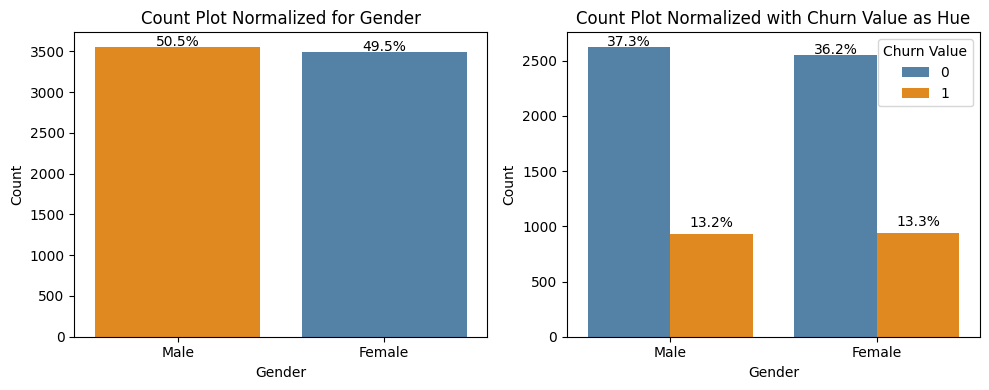

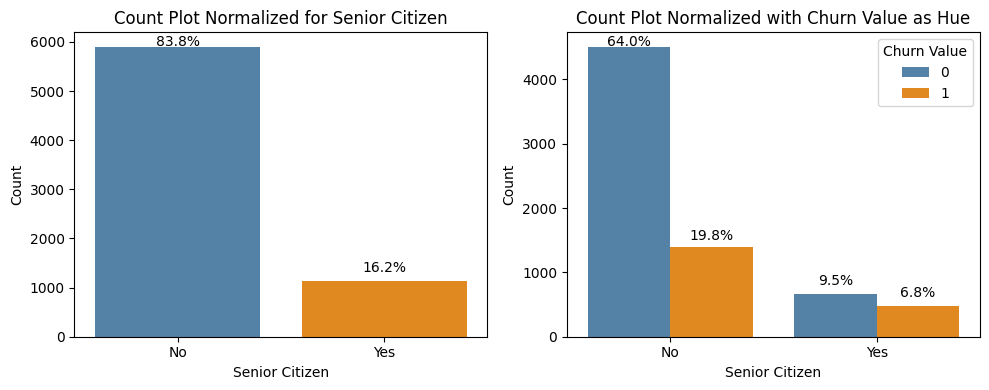

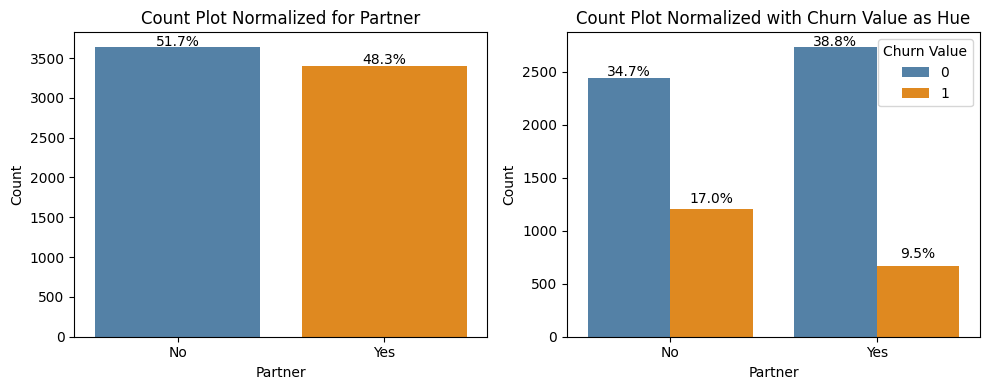

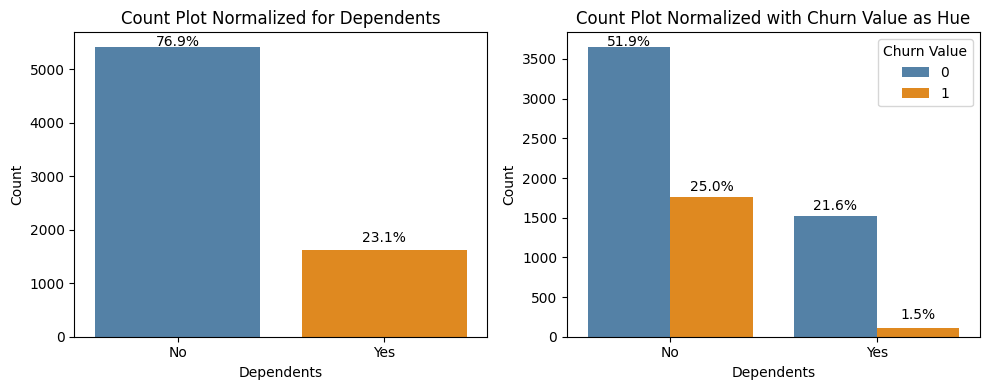

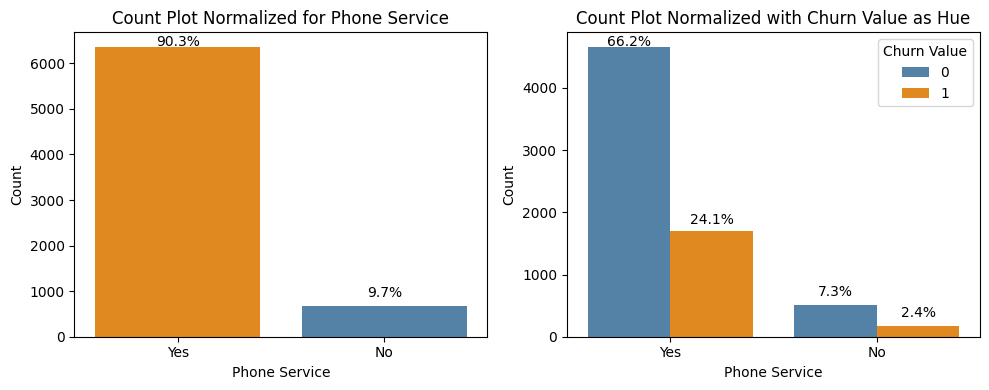

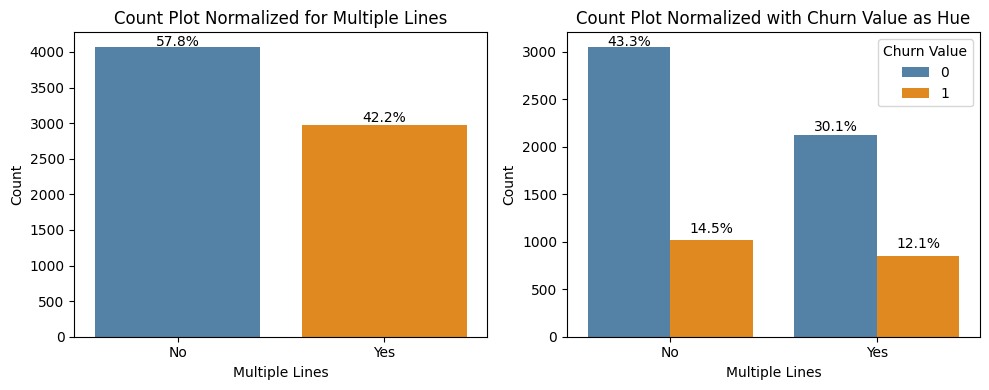

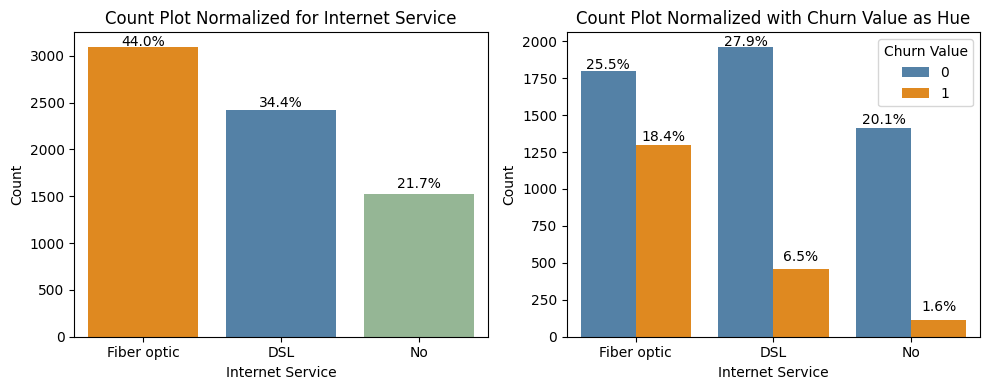

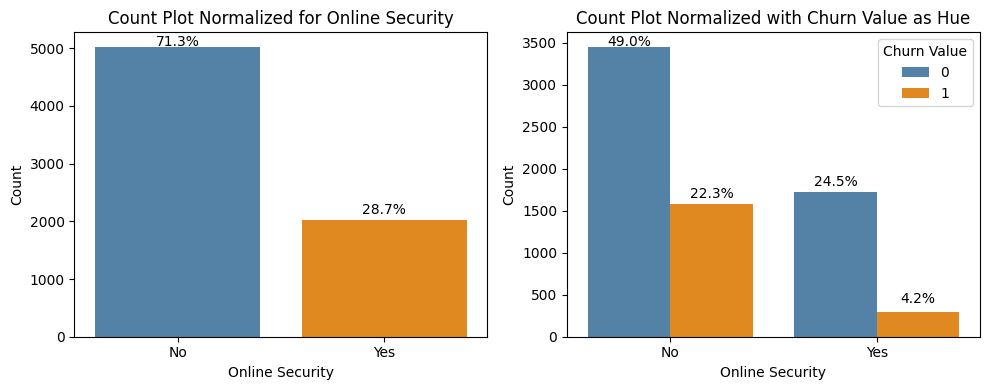

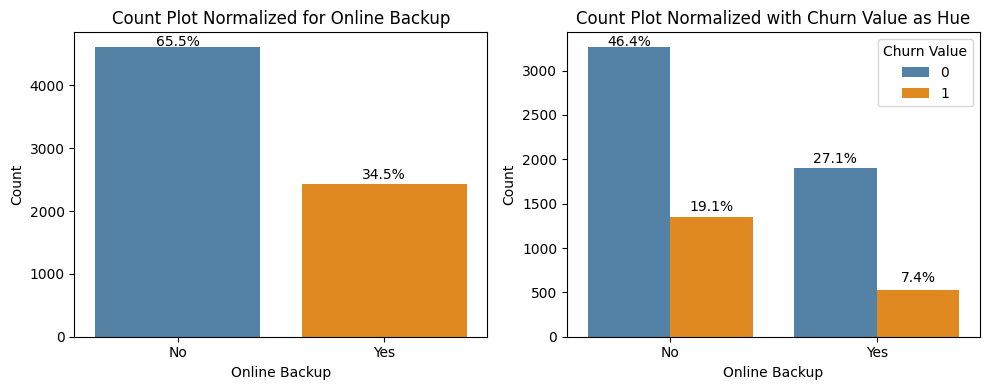

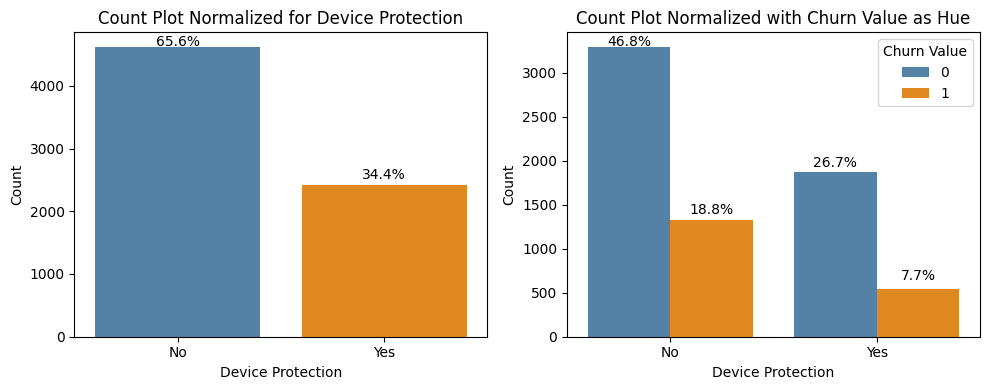

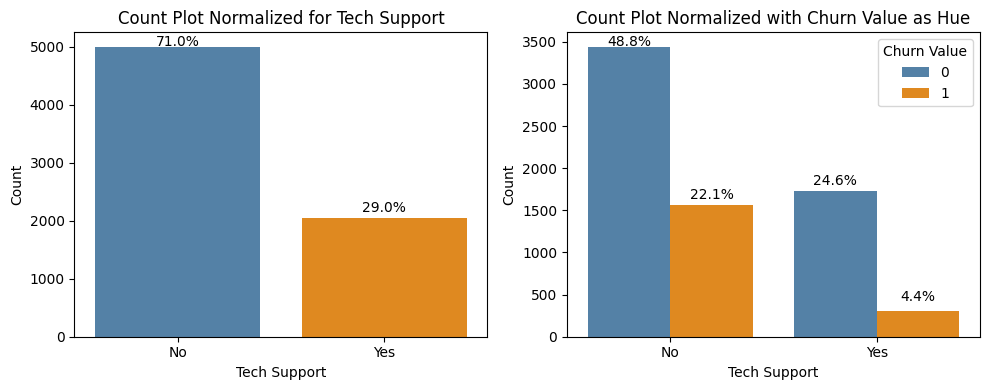

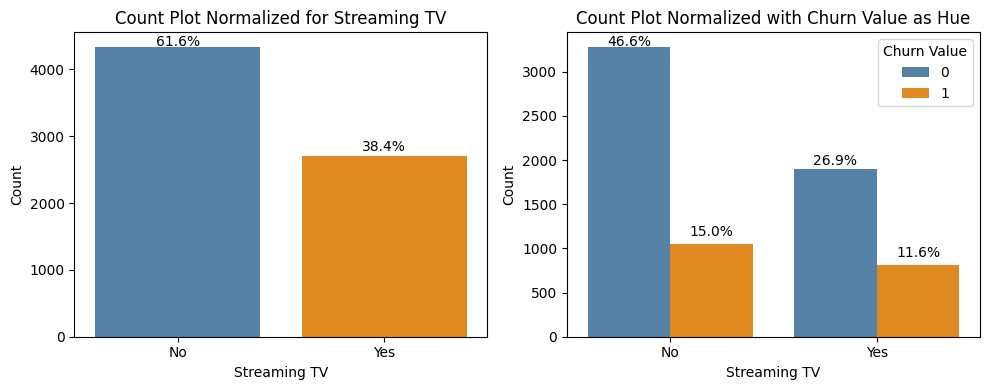

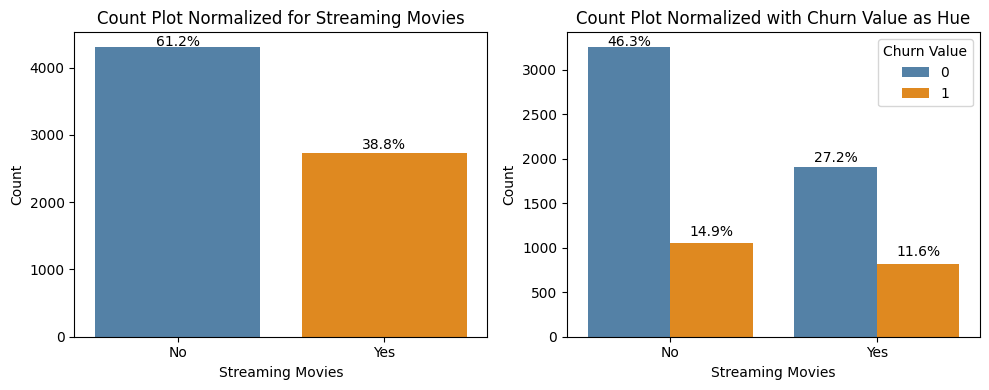

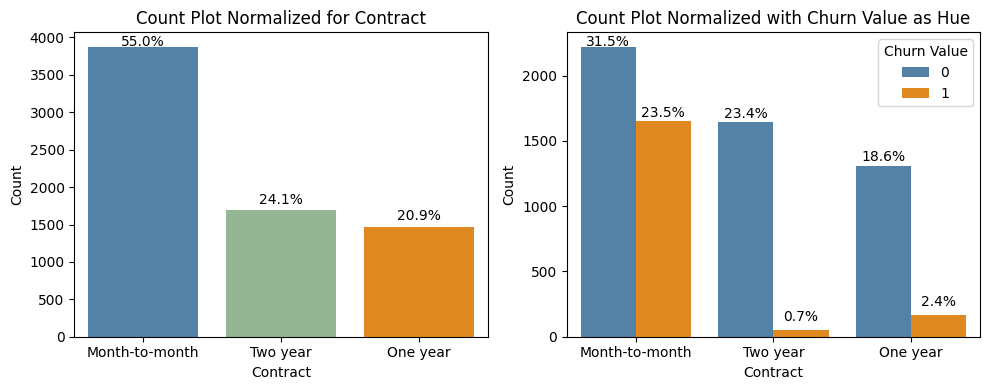

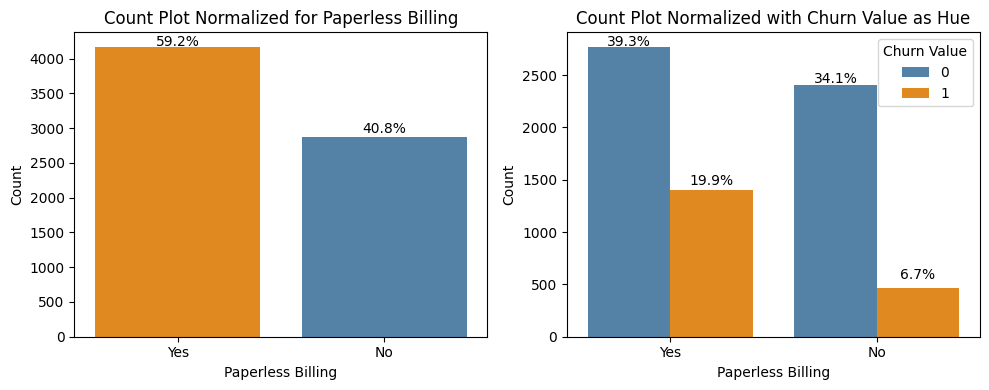

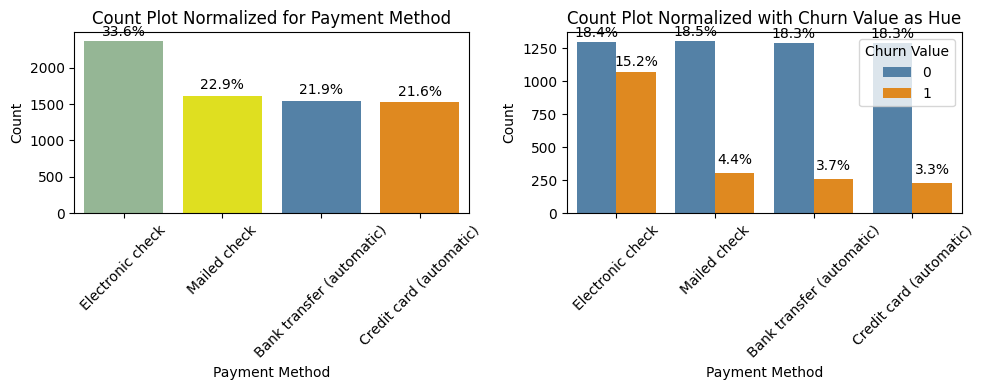

In [61]:
for cat_col in categorical_cols:
  #unique_classes = df[cat_col].unique()
  #print(unique_classes)
    if cat_col != 'City' and cat_col != 'Payment Method':
        plot_count_plots(df , cat_col, 'Churn Value')

plot_count_plots(df , 'Payment Method', 'Churn Value', 45)

*   Number of femal and male customers are nearly the same.
*   Nearly 16% of the customers are seniors.
*   Nearly 51% of the customers has no parteners.
*   The majority of customers, more than 78%, do not live with any dependents.
*   Fiber optic is the most used Internt Service with approximatly 45%, DSL comes next with nearly 35% and 20% of the customers have no Internet Service.
*   **More than 42% of customers who use Fiber Optic are churnning**, 20% of those who use DSL are churnning, and nearly 8% of the customers who does not use Internet Service are churnning.
*  More than 54% of customers get a Month-to-Month contract, nearly 24% for Two year and 21% for one year contracts.
*  Customers with Month-to-Month contracts are the highest to churn while customers with two year contracts are the least to churn. **We can conclude that the longer the contract period, the less probable the customer will churn.**
*  Majority of customers have phone service, more than 86% of customers.
*  Only 30% of the customers subscribed to a Tech support plan.
*  There is a higher Churn Ratio among those customers who do not seek Technical support (This might indicate that Tech support might require improvement)
*  Nearly 59% of the customers has chosen paperless billing which is good to the environment.

## Descriptive statistics for numerical variables.

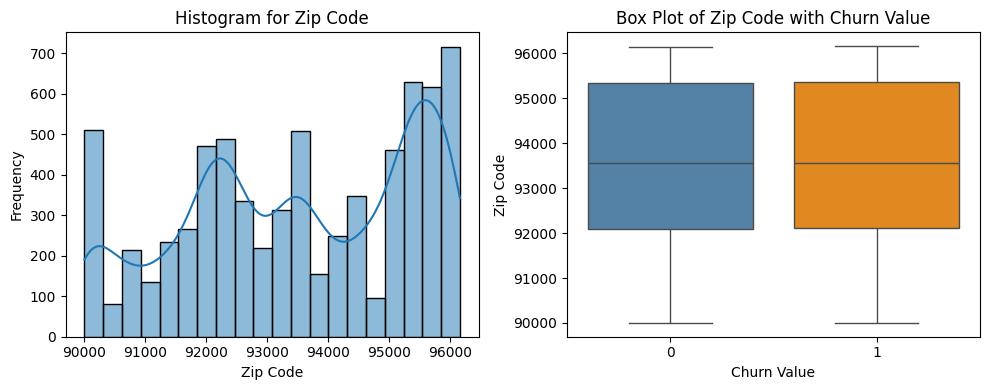

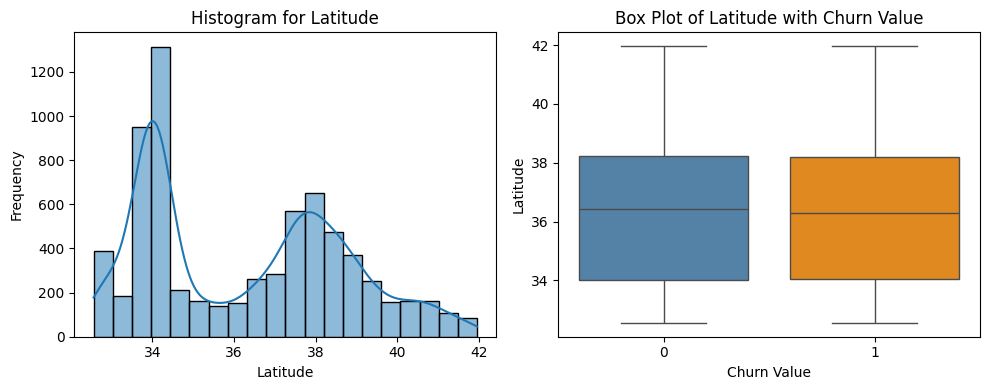

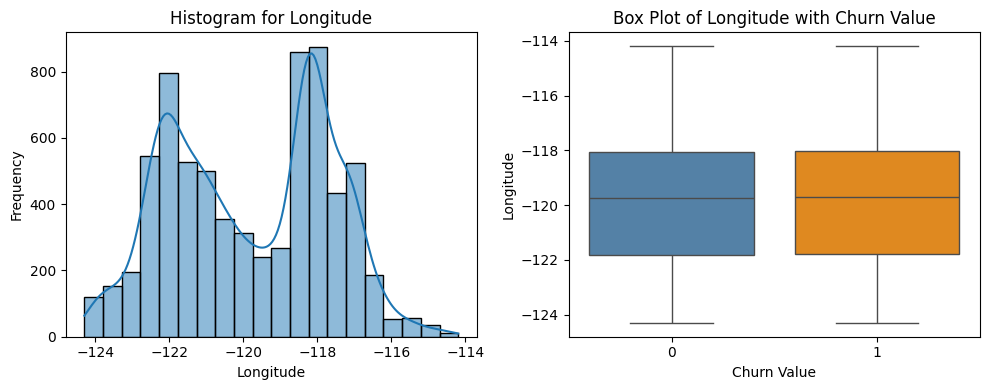

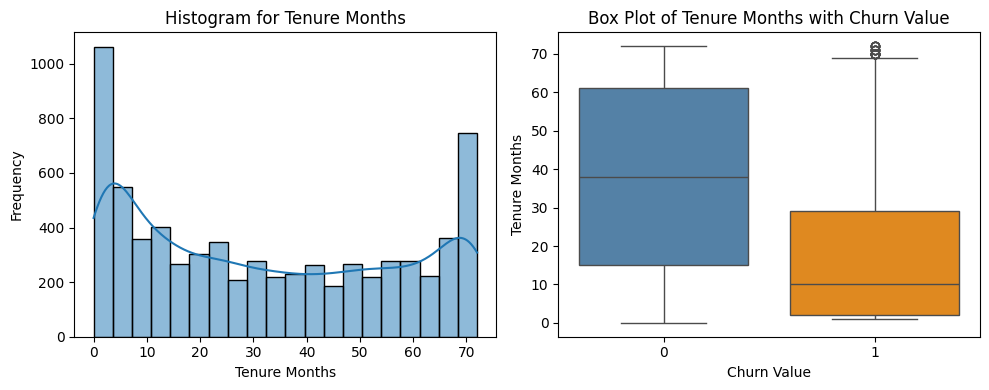

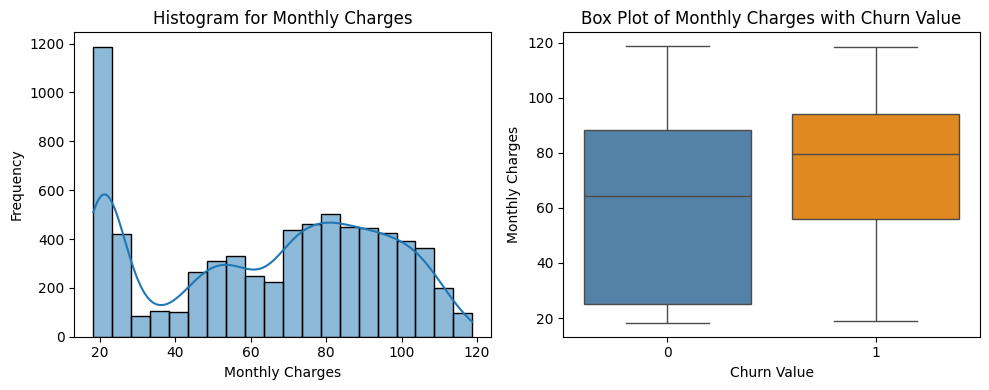

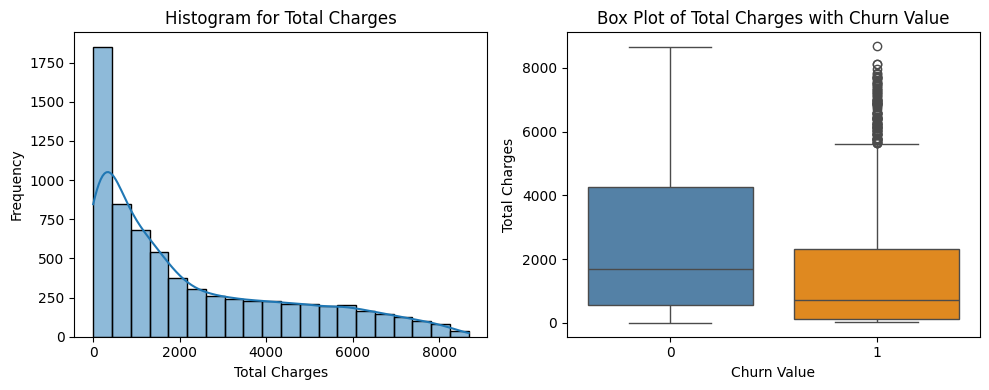

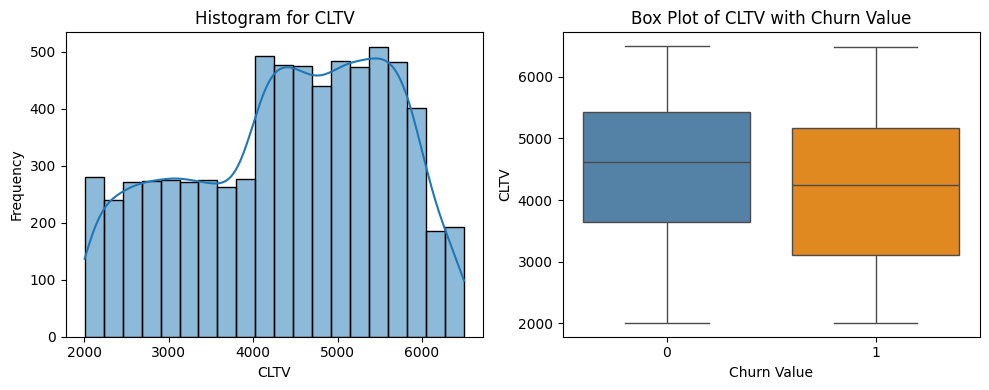

In [62]:
for num_col in numerical_cols.drop('Churn Value'):
    plot_numerical_variable(df, num_col, 'Churn Value')

*  Distribution Zip Code, Latitude and Longitude seem to be the same for churning and non-churning customers, **geographical location does not seem to affect the churning rate.**
*  Churning customers tend to have lower tenure month value and lower total charges values on avergae compared to non-churning customers.
*  Most customers' total charges are less than 2000$ with numbers of customers decreasing as total charges increases.

## Churn Ratio by Contract and Internet Service

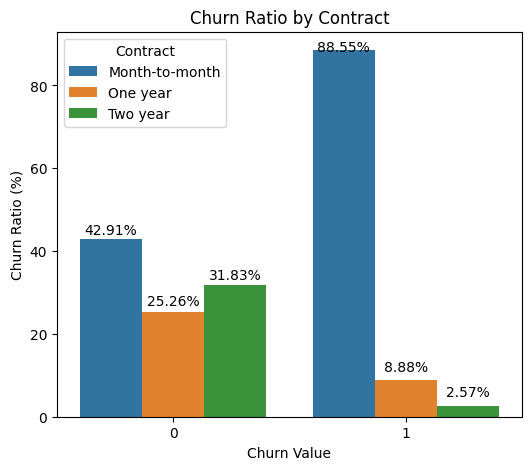

In [63]:
plot_churn_ratio(df, 'Churn Value', 'Contract')

* The figure shows that **almost 90% of the customers who left the company were using
Month-to-Month contract.**
* The longer one's contract was, the less likely one will left the company.

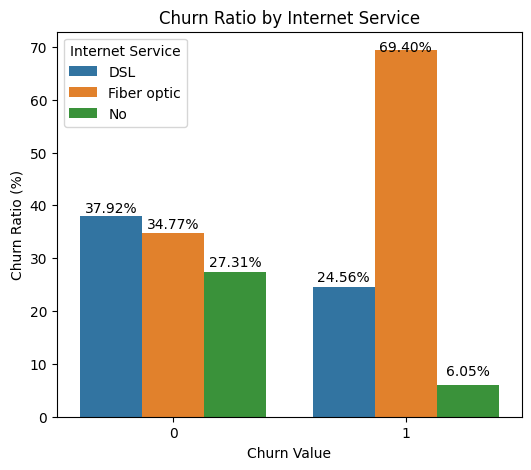

In [64]:
plot_churn_ratio(df, 'Churn Value', 'Internet Service')

**Customers who use Fiber Optics contribute to 70% of the overall churnning customers.** We should pay attention to this variable in our analysis.

## Correlation Matrix

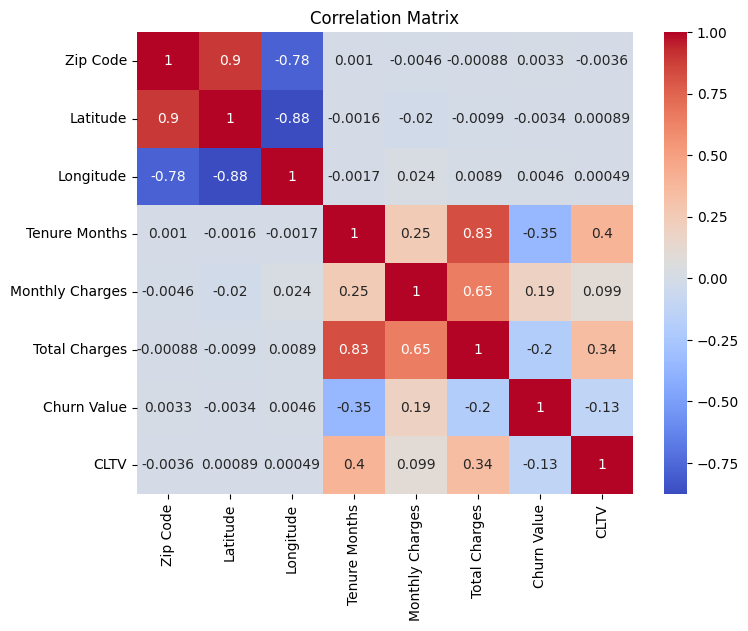

In [65]:
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# 3.Feature Engineering

## Categorical Variables
we convert categorical variables exist  into numerical data using *LabelEncoder* as a feature.

In [66]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Labeling each categorical columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Checking outcome
print(df[categorical_cols])


      City  Gender  Senior Citizen  Partner  Dependents  Phone Service  \
0      562       1               0        0           0              1   
1      562       0               0        0           1              1   
2      562       0               0        0           1              1   
3      562       0               0        1           1              1   
4      562       1               0        0           1              1   
...    ...     ...             ...      ...         ...            ...   
7038   521       0               0        0           0              1   
7039     2       1               0        1           1              1   
7040    22       0               0        1           1              1   
7041    26       0               0        1           1              0   
7042    32       1               0        0           0              1   

      Multiple Lines  Internet Service  Online Security  Online Backup  \
0                  0                 

## Latitude and Longitude
We use kmeans approach to cluster geographical data (latitude and longitude) with fake labels for classification. It determines the optimal number of neighbors through cross-validation, applies the KNN model to classify or cluster the data points, and finally outputs the clustering results.



In [67]:
# Function to find the best k using cross-validation
def find_best_k(X, max_k=10):
    k_range = range(2, max_k + 1)
    best_k = 0
    best_score = 0
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
        mean_score = scores.mean()
        if mean_score > best_score:
            best_score = mean_score
            best_k = k
    return best_k

# Create fake labels (since KNN is supervised, we need some labels for this example)
# Here, we'll cluster the data into 2 groups using a threshold for Latitude as a fake label.
df['label'] = (df['Latitude'] > df['Latitude'].mean()).astype(int)
y = df['label']

# Select Latitude and Longitude for clustering
X = df[['Latitude', 'Longitude']]

# Find the best k
best_k = find_best_k(X)
print(f"The best number of neighbors: {best_k}")

# Perform KNN classification using the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X, y)
df['if_neighbor'] = knn.predict(X)
df = df.drop(columns=['label'])
# Output the clustered data
print("Clustered Data with Best K:")
print(df[['Latitude', 'Longitude', 'if_neighbor']].head(10))
print(df['if_neighbor'].tolist().count(1))


The best number of neighbors: 2
Clustered Data with Best K:
    Latitude   Longitude  if_neighbor
0  33.964131 -118.272783            0
1  34.059281 -118.307420            0
2  34.048013 -118.293953            0
3  34.062125 -118.315709            0
4  34.039224 -118.266293            0
5  34.066367 -118.309868            0
6  34.023810 -118.156582            0
7  34.066303 -118.435479            0
8  34.099869 -118.326843            0
9  34.089953 -118.294824            0
3568


## Evaluation scores using Lasso
Idea behind this method is to construct predictive indicators that show how much of a person's tendency to churn. We assume our data contains

The procedure is as follows:
1. pick variables that we hope to be beneficial for our analysis based on observation.
2. using mean value of picked variable as a threshold to construct a binary variable.
3. Using arbitrary models(we pick Lasso*) to predict the binary number.
4. Using predicted value(predicted binary number) × 100* as our evaluation score.

\* Lasso has variable selection trait from regularization, which enable us to derive good prediciton perfomance effortlessly.

\* the value times 100 is not necessary. The purpose is to visualize numbers for us to understand.





### Evaluation Score 1
---
 From observation, suppose a customer is charged high monthly, they are more likely to churn.

In [68]:
# Create 'if_charge_high_month' column: 1 if Monthly Charges > median, 0 otherwise
df['if_charge_high_month'] = (df['Monthly Charges'] > df['Monthly Charges'].median()).astype(int)

# Select all non-object columns except 'Zip Code', 'Latitude', 'Longitude'
non_object_columns = df.select_dtypes(exclude='object').columns.drop(['Zip Code', 'Latitude', 'Longitude'])

# Define X (features) and y (target)
X = df[non_object_columns.drop('if_charge_high_month',categorical_cols)]  # Drop target column from features
y = df['if_charge_high_month']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso regression model
lasso = Ridge(alpha=0.1)  # You can adjust alpha for regularization strength

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the entire dataset (you can also do this for just the test set)
y_pred = lasso.predict(X)

# Since Lasso is a regression model, the predictions are continuous values. We can use a threshold
# (e.g., 0.5) to decide whether the predicted value indicates a high or low charge.
# For binary classification (high charge = 1, low charge = 0), use threshold of 0.5.
y_pred_classified = (y_pred > 0.5).astype(int)

# Add the predicted score and classification to the DataFrame
df['evaluation_score1'] = y_pred * 100 # Store the raw regression scores

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred_classified)

# Multiply by 100 to get the accuracy score as a percentage
evaluation_score = accuracy * 100

# Print the evaluation score
print(f"Lasso Model Accuracy Score: {evaluation_score}%")

# If needed, you can examine the predictions in df
df['evaluation_score1']

Lasso Model Accuracy Score: 95.3144966633537%


,evaluation_score1
0,15.325421
1,64.690525
2,110.766259
3,116.494263
4,110.376022
...,...
7038,1.116723
7039,64.471515
7040,105.987813
7041,-20.539304


### Evaluation Score 2
---
 From observation, suppose the Tenure is long, they are more likely to churn.

In [69]:
# Create 'if_retain_high' column: 1 if Tenure Months > median, 0 otherwise
df['if_retain_high'] = (df['Tenure Months'] > df['Tenure Months'].median()).astype(int)

# Select all non-object columns except 'Zip Code', 'Latitude', 'Longitude'
non_object_columns = df.select_dtypes(exclude='object').columns.drop(['Zip Code', 'Latitude', 'Longitude'])

# Define X (features) and y (target)
X = df[non_object_columns.drop('if_retain_high',categorical_cols)]  # Drop target column from features
y = df['if_retain_high']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso regression model
lasso = Ridge(alpha=0.1)  # You can adjust alpha for regularization strength

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the entire dataset (you can also do this for just the test set)
y_pred = lasso.predict(X)

# Since Lasso is a regression model, the predictions are continuous values. We can use a threshold
# (e.g., 0.5) to decide whether the predicted value indicates a high or low charge.
# For binary classification (high charge = 1, low charge = 0), use threshold of 0.5.
y_pred_classified = (y_pred > 0.5).astype(int)

# Add the predicted score and classification to the DataFrame
df['evaluation_score2'] = y_pred * 100 # Store the raw regression scores

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred_classified)

# Multiply by 100 to get the accuracy score as a percentage
evaluation_score = accuracy * 100

# Print the evaluation score
print(f"Lasso Model Accuracy Score: {evaluation_score}%")

# If needed, you can examine the predictions in df
df['evaluation_score2']

Lasso Model Accuracy Score: 97.62885134175777%


,evaluation_score2
0,-5.586963
1,-1.141063
2,6.355425
3,42.802992
4,82.250172
...,...
7038,125.382677
7039,35.008489
7040,120.310461
7041,10.951682


### Evalutaion Score 3
---
 From observation, suppose customers are charged high in total, they are more likely to stay.

In [70]:
# Create 'if_charge_high＿total' column: 1 if Total Charges > median, 0 otherwise
df['if_charge_high_total'] = (df['Total Charges'] > df['Total Charges'].median()).astype(int)

# Select all non-object columns except 'Zip Code', 'Latitude', 'Longitude'
non_object_columns = df.select_dtypes(exclude='object').columns.drop(['Zip Code', 'Latitude', 'Longitude'])

# Define X (features) and y (target)
X = df[non_object_columns.drop('if_charge_high_total',categorical_cols)]  # Drop target column from features
y = df['if_charge_high_total']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso regression model
lasso = Ridge(alpha=0.1)  # You can adjust alpha for regularization strength

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the entire dataset (you can also do this for just the test set)
y_pred = lasso.predict(X)

# Since Lasso is a regression model, the predictions are continuous values. We can use a threshold
# (e.g., 0.5) to decide whether the predicted value indicates a high or low charge.
# For binary classification (high charge = 1, low charge = 0), use threshold of 0.5.
y_pred_classified = (y_pred > 0.5).astype(int)

# Add the predicted score and classification to the DataFrame
df['evaluation_score3'] = y_pred * 100 # Store the raw regression scores

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred_classified)

# Multiply by 100 to get the accuracy score as a percentage
evaluation_score = accuracy * 100

# Print the evaluation score
print(f"Lasso Model Accuracy Score: {evaluation_score}%")

# If needed, you can examine the predictions in df
df['evaluation_score3']

Lasso Model Accuracy Score: 92.6309811160017%


,evaluation_score3
0,9.093019
1,6.520006
2,27.012992
3,57.818863
4,96.488815
...,...
7038,57.269011
7039,55.778726
7040,120.662144
7041,14.745388


###Evalutaion Score 4
---
 From observation,suppose customers with higher CLTV, they are likely to stay.

In [71]:
# Create 'if_CLTV_high' column: 1 if CLTV > median, 0 otherwise
df['if_CLTV_high'] = (df['CLTV'] > df['CLTV'].median()).astype(int)

# Select all non-object columns except 'Zip Code', 'Latitude', 'Longitude'
non_object_columns = df.select_dtypes(exclude='object').columns.drop(['Zip Code', 'Latitude', 'Longitude'])

# Define X (features) and y (target)
X = df[non_object_columns.drop('if_CLTV_high',categorical_cols)]  # Drop target column from features
y = df['if_CLTV_high']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso regression model
lasso = Ridge(alpha=0.1)  # You can adjust alpha for regularization strength

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the entire dataset (you can also do this for just the test set)
y_pred = lasso.predict(X)

# Since Lasso is a regression model, the predictions are continuous values. We can use a threshold
# (e.g., 0.5) to decide whether the predicted value indicates a high or low charge.
# For binary classification (high charge = 1, low charge = 0), use threshold of 0.5.
y_pred_classified = (y_pred > 0.5).astype(int)

# Add the predicted score and classification to the DataFrame
df['evaluation_score4'] = y_pred * 100 # Store the raw regression scores

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred_classified)

# Multiply by 100 to get the accuracy score as a percentage
evaluation_score = accuracy * 100

# Print the evaluation score
print(f"Lasso Model Accuracy Score: {evaluation_score}%")

# If needed, you can examine the predictions in df
df['evaluation_score4']

Lasso Model Accuracy Score: 96.19480335084482%


,evaluation_score4
0,12.374720
1,-9.739171
2,83.886093
3,71.413101
4,81.395193
...,...
7038,82.776221
7039,-28.886283
7040,89.141250
7041,-5.266520


# 4.Models and Accuracy
In this section, we propose logistic regression, MLP, and GBDT and compare results between using only original features and using data with feature engineering. The comparison between each models will be shown in **Comparison section.**


In [72]:
all_var = df.select_dtypes(exclude='object').columns
all_var


Index(['City', 'Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value', 'CLTV',
       'if_neighbor', 'if_charge_high_month', 'evaluation_score1',
       'if_retain_high', 'evaluation_score2', 'if_charge_high_total',
       'evaluation_score3', 'if_CLTV_high', 'evaluation_score4'],
      dtype='object')

## Logistic Regression

In [73]:
categorical_cols

Index(['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method'],
      dtype='object')

In [74]:
var2drop = ['Zip Code','Longitude','City','Latitude','Churn Value','if_neighbor','if_charge_high_month', 'evaluation_score1',
       'if_retain_high', 'evaluation_score2', 'if_charge_high_total',
       'evaluation_score3', 'if_CLTV_high', 'evaluation_score4',]
var2drop_if = ['City','Zip Code','Longitude','Latitude','Churn Value','if_charge_high_month','if_retain_high','if_charge_high_total','if_CLTV_high']


Original Result
Optimization terminated successfully.
         Current function value: 0.397082
         Iterations 8
In-Sample Accuracy (Training): 0.81
Out-Sample Accuracy (Testing): 0.80

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1009
           1       0.68      0.57      0.62       400

    accuracy                           0.80      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409


Confusion Matrix (Test Set):
[[902 107]
 [171 229]]


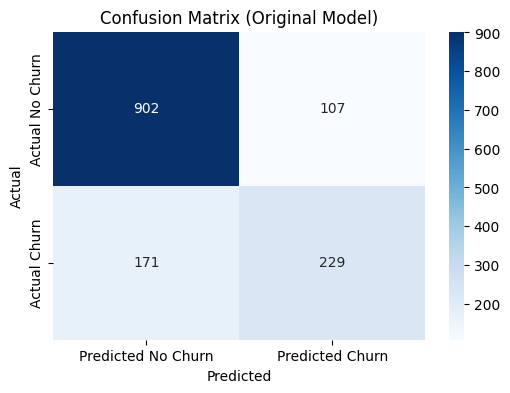


Logistic Regression Summary:
                           Logit Regression Results                           
Dep. Variable:            Churn Value   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5613
Method:                           MLE   Df Model:                           20
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                  0.3080
Time:                        16:54:39   Log-Likelihood:                -2237.2
converged:                       True   LL-Null:                       -3232.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6059      0.249     -2.431      0.015      -1.094      -0.117
Gender               -0.0371      0.074     -0.501      0.617      -0.182       

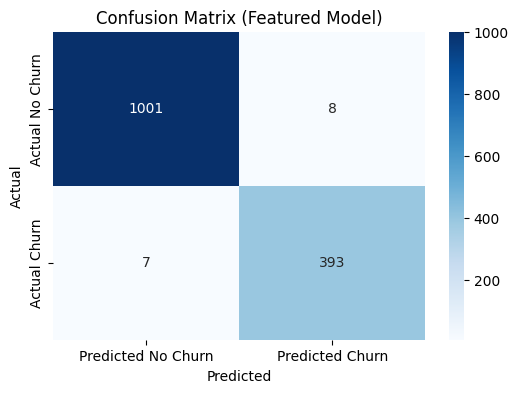


Logistic Regression Summary:
                           Logit Regression Results                           
Dep. Variable:            Churn Value   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5608
Method:                           MLE   Df Model:                           25
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                  0.9654
Time:                        16:54:39   Log-Likelihood:                -111.91
converged:                       True   LL-Null:                       -3232.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1306.1622    199.307      6.554      0.000     915.527    1696.797
Gender                0.4138      1.470      0.281      0.778      -2.467       

In [75]:
for i in ["Original", 'Featured']:
    print(f"\n{i} Result")
    if i == "Original":
        X = df[all_var.drop(var2drop)]  # Drop target column from features
        y = df['Churn Value']
    else:  # Featured
        X = df[all_var.drop(var2drop_if)]  # Drop target column from features
        y = df['Churn Value']
    # Seperating the data to trainning set and testing set (80% trainning, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Adding constant terms (intercept)，as statsmodels does not include it automatically.
    X_train_sm = sm.add_constant(X_train)
    X_test_sm = sm.add_constant(X_test)

    # Using statsmodels to perform Logistic Regression
    logit_model = sm.Logit(y_train, X_train_sm)
    result = logit_model.fit()

    # Prediction
    y_train_pred = (result.predict(X_train_sm) >= 0.5).astype(int)
    y_test_pred = (result.predict(X_test_sm) >= 0.5).astype(int)

    # Calculating accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Print the outcome
    print(f"In-Sample Accuracy (Training): {train_accuracy:.2f}")
    print(f"Out-Sample Accuracy (Testing): {test_accuracy:.2f}")

    # Evaluating the model
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))
    print("\nConfusion Matrix (Test Set):")
    cm = confusion_matrix(y_test, y_test_pred)
    print(cm)

    # Visualizing confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No Churn', 'Predicted Churn'], yticklabels=['Actual No Churn', 'Actual Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({i} Model)')
    plt.show()

    # Summary
    print("\nLogistic Regression Summary:")
    print(result.summary())


## Neural Network (MLP)



Original Result
--------------------------------------------------------
MLP is processed with hyperparameters 100 and 100


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.85
Accuracy on test set: 0.79

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1009
           1       0.66      0.57      0.61       400

    accuracy                           0.79      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.79      0.79      0.79      1409


Confusion Matrix (Test Set):
[[891 118]
 [172 228]]
MLP is processed with hyperparameters 100 and 1000
Accuracy on training set: 0.94
Accuracy on test set: 0.77

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1009
           1       0.60      0.55      0.57       400

    accuracy                           0.77      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.76      0.77      0.77      1409


Confusion Matrix (Test Set):
[[866 143]
 [181 219]]
MLP

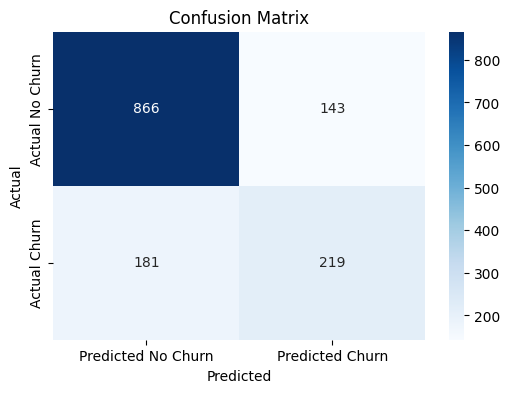


Feature Importance (MLP does not have direct coefficients like logistic regression):
Layer 1 - Gender: 0.012385781170125246
Layer 1 - Senior Citizen: -0.041664211772260255
Layer 1 - Partner: 0.028226701393128245
Layer 1 - Dependents: -0.022868494329338077
Layer 1 - Tenure Months: -0.01151756256950384
Layer 1 - Phone Service: -0.0230162975479241
Layer 1 - Multiple Lines: -0.052406121078311066
Layer 1 - Internet Service: 0.06470546685898605
Layer 1 - Online Security: -0.013985065218759456
Layer 1 - Online Backup: 0.01684208126021528
Layer 1 - Device Protection: 0.03131859441212244
Layer 1 - Tech Support: 0.05421575031517722
Layer 1 - Streaming TV: -0.052367752568224034
Layer 1 - Streaming Movies: -0.021685920115458255
Layer 1 - Contract: 0.07588685783713714
Layer 1 - Paperless Billing: 0.05221658919154021
Layer 1 - Payment Method: 0.006055260969233414
Layer 1 - Monthly Charges: 0.016744378631015508
Layer 1 - Total Charges: 0.04720751564724906
Layer 1 - CLTV: -0.0012773460161709558
MLP i

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.86
Accuracy on test set: 0.79

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1009
           1       0.66      0.53      0.59       400

    accuracy                           0.79      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix (Test Set):
[[902 107]
 [188 212]]
MLP is processed with hyperparameters 200 and 1000
Accuracy on training set: 0.96
Accuracy on test set: 0.77

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1009
           1       0.61      0.52      0.56       400

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.76      0.77      0.76      1409


Confusion Matrix (Test Set):
[[877 132]
 [194 206]]
MLP

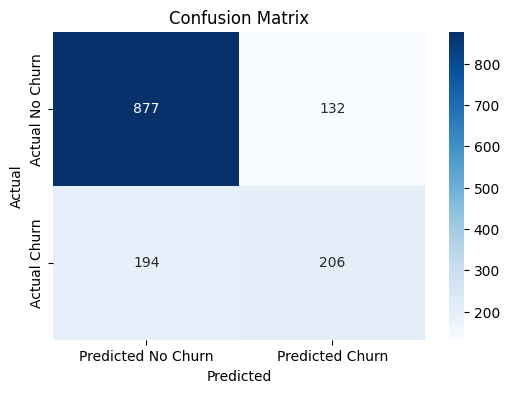


Feature Importance (MLP does not have direct coefficients like logistic regression):
Layer 1 - Gender: -0.018225398425503702
Layer 1 - Senior Citizen: -0.0035004423227780255
Layer 1 - Partner: 0.03241152733962896
Layer 1 - Dependents: 0.008458568155755273
Layer 1 - Tenure Months: -0.04080084795162474
Layer 1 - Phone Service: 0.019983099058097267
Layer 1 - Multiple Lines: 0.010595197491066547
Layer 1 - Internet Service: 0.0297990275511103
Layer 1 - Online Security: -0.03417999168085837
Layer 1 - Online Backup: -0.0026781399115610905
Layer 1 - Device Protection: 0.038498538551063825
Layer 1 - Tech Support: -0.04489049292681566
Layer 1 - Streaming TV: 0.019673761770533402
Layer 1 - Streaming Movies: -0.018642947673741778
Layer 1 - Contract: 0.026403272035950557
Layer 1 - Paperless Billing: 0.017172927789811197
Layer 1 - Payment Method: -0.006830568550352294
Layer 1 - Monthly Charges: 0.008548430919446822
Layer 1 - Total Charges: -0.009823642221624173
Layer 1 - CLTV: -0.014644432961737001

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.89
Accuracy on test set: 0.79

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1009
           1       0.64      0.59      0.61       400

    accuracy                           0.79      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.78      0.79      0.79      1409


Confusion Matrix (Test Set):
[[876 133]
 [164 236]]
MLP is processed with hyperparameters 500 and 1000
Accuracy on training set: 0.96
Accuracy on test set: 0.79

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1009
           1       0.63      0.60      0.62       400

    accuracy                           0.79      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix (Test Set):
[[865 144]
 [158 242]]
MLP

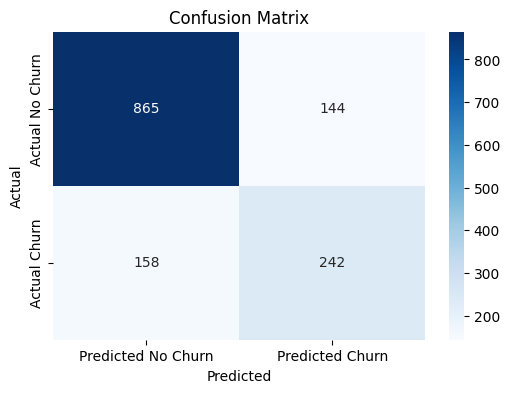


Feature Importance (MLP does not have direct coefficients like logistic regression):
Layer 1 - Gender: -0.01521268809728125
Layer 1 - Senior Citizen: -0.02194317221088603
Layer 1 - Partner: 0.023689853753335075
Layer 1 - Dependents: 0.004492612615619109
Layer 1 - Tenure Months: -0.0015109419628962569
Layer 1 - Phone Service: 0.0010464511386311002
Layer 1 - Multiple Lines: -0.004191351104426135
Layer 1 - Internet Service: 0.017467652536038023
Layer 1 - Online Security: -0.007778695701222996
Layer 1 - Online Backup: -0.012910140399745827
Layer 1 - Device Protection: 0.008842756401582335
Layer 1 - Tech Support: -0.020866383484245753
Layer 1 - Streaming TV: 0.005563210365262149
Layer 1 - Streaming Movies: -0.01628966178841729
Layer 1 - Contract: 0.023408686423969975
Layer 1 - Paperless Billing: -0.005193968595750276
Layer 1 - Payment Method: -0.014068585644984654
Layer 1 - Monthly Charges: 0.007079454602368831
Layer 1 - Total Charges: 0.004143365942705745
Layer 1 - CLTV: 0.000986169365768

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.91
Accuracy on test set: 0.79

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1009
           1       0.63      0.61      0.62       400

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409


Confusion Matrix (Test Set):
[[868 141]
 [156 244]]
MLP is processed with hyperparameters 1000 and 1000
Accuracy on training set: 0.98
Accuracy on test set: 0.78

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1009
           1       0.62      0.55      0.58       400

    accuracy                           0.78      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.77      0.78      0.77      1409


Confusion Matrix (Test Set):
[[874 135]
 [179 221]]
ML

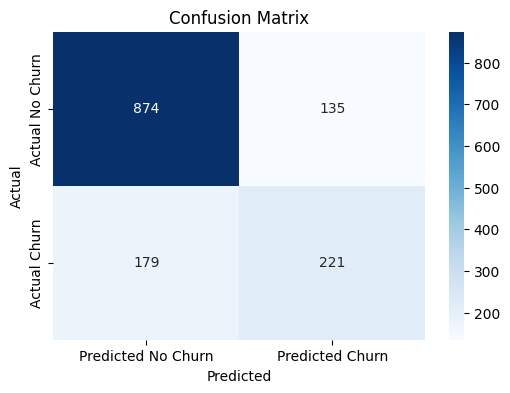


Feature Importance (MLP does not have direct coefficients like logistic regression):
Layer 1 - Gender: -0.007271233362916482
Layer 1 - Senior Citizen: -0.003028235296857777
Layer 1 - Partner: 0.017532037797994487
Layer 1 - Dependents: 0.014384970953426961
Layer 1 - Tenure Months: -0.003732732659334001
Layer 1 - Phone Service: -0.0015310700980291183
Layer 1 - Multiple Lines: -0.0015645931228240263
Layer 1 - Internet Service: 0.015103613786008725
Layer 1 - Online Security: -0.014421116424771932
Layer 1 - Online Backup: -0.004236818182068573
Layer 1 - Device Protection: 0.009568523402740262
Layer 1 - Tech Support: -0.013857710753742305
Layer 1 - Streaming TV: 0.0011109481058450834
Layer 1 - Streaming Movies: -0.00013381439001655183
Layer 1 - Contract: 0.031231375591132256
Layer 1 - Paperless Billing: 0.0014109487088395265
Layer 1 - Payment Method: -0.009273290653556122
Layer 1 - Monthly Charges: 0.001694472940368512
Layer 1 - Total Charges: -0.008903760841299402
Layer 1 - CLTV: 0.0176904

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.95
Accuracy on test set: 0.90

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1009
           1       0.86      0.76      0.81       400

    accuracy                           0.90      1409
   macro avg       0.88      0.85      0.87      1409
weighted avg       0.89      0.90      0.89      1409


Confusion Matrix (Test Set):
[[958  51]
 [ 96 304]]
MLP is processed with hyperparameters 100 and 1000
Accuracy on training set: 1.00
Accuracy on test set: 0.96

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1009
           1       0.95      0.91      0.93       400

    accuracy                           0.96      1409
   macro avg       0.96      0.95      0.95      1409
weighted avg       0.96      0.96      0.96      1409


Confusion Matrix (Test Set):
[[991  18]
 [ 36 364]]
MLP

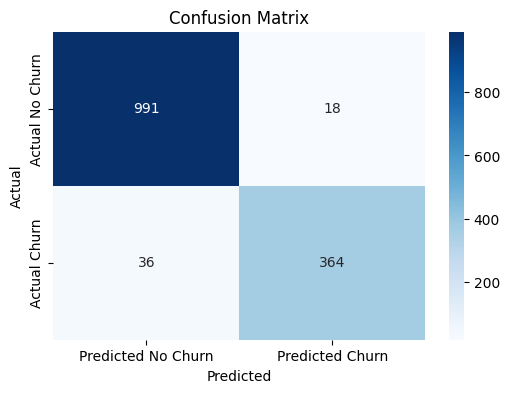


Feature Importance (MLP does not have direct coefficients like logistic regression):
Layer 1 - Gender: -0.01679875406137558
Layer 1 - Senior Citizen: -0.052985565489323774
Layer 1 - Partner: 0.00455245812859293
Layer 1 - Dependents: -0.013253219484305665
Layer 1 - Tenure Months: -0.09702351025312053
Layer 1 - Phone Service: -0.019405802614567556
Layer 1 - Multiple Lines: -0.048696456040939175
Layer 1 - Internet Service: 0.045770906631396234
Layer 1 - Online Security: 0.0030708312214729593
Layer 1 - Online Backup: -0.06933955117225259
Layer 1 - Device Protection: 0.017801523929922458
Layer 1 - Tech Support: -0.04215561350391912
Layer 1 - Streaming TV: 0.006787274303167481
Layer 1 - Streaming Movies: -0.015826008717203945
Layer 1 - Contract: 0.06385502793093345
Layer 1 - Paperless Billing: -0.012713294158891952
Layer 1 - Payment Method: 0.08668961698160459
Layer 1 - Monthly Charges: 0.04061340798925653
Layer 1 - Total Charges: 0.015592546238756803
Layer 1 - CLTV: 0.01235021080263726
Lay

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.97
Accuracy on test set: 0.92

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1009
           1       0.88      0.83      0.86       400

    accuracy                           0.92      1409
   macro avg       0.91      0.89      0.90      1409
weighted avg       0.92      0.92      0.92      1409


Confusion Matrix (Test Set):
[[965  44]
 [ 67 333]]
MLP is processed with hyperparameters 200 and 1000
Accuracy on training set: 1.00
Accuracy on test set: 0.96

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1009
           1       0.94      0.90      0.92       400

    accuracy                           0.96      1409
   macro avg       0.95      0.94      0.95      1409
weighted avg       0.96      0.96      0.96      1409


Confusion Matrix (Test Set):
[[987  22]
 [ 40 360]]
MLP

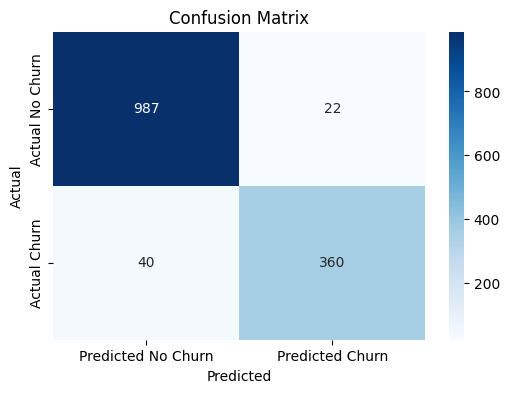


Feature Importance (MLP does not have direct coefficients like logistic regression):
Layer 1 - Gender: -0.003413461691854709
Layer 1 - Senior Citizen: -0.024936513077169948
Layer 1 - Partner: -0.003817622568987414
Layer 1 - Dependents: -0.005686617222700883
Layer 1 - Tenure Months: -0.06770767777092114
Layer 1 - Phone Service: 0.012542356449280154
Layer 1 - Multiple Lines: -0.0037300926690009345
Layer 1 - Internet Service: 0.03295176440052004
Layer 1 - Online Security: -0.009268192352136238
Layer 1 - Online Backup: -0.0050506183101002985
Layer 1 - Device Protection: 0.012623312596262877
Layer 1 - Tech Support: -0.048678835325675004
Layer 1 - Streaming TV: 0.030876444771857664
Layer 1 - Streaming Movies: 0.015643108415006424
Layer 1 - Contract: 0.03159553390801353
Layer 1 - Paperless Billing: -0.007035386466471572
Layer 1 - Payment Method: -4.2074572915529183e-05
Layer 1 - Monthly Charges: 0.033165616521131626
Layer 1 - Total Charges: 0.004122751380116818
Layer 1 - CLTV: 0.016499340386

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.99
Accuracy on test set: 0.94

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1009
           1       0.92      0.87      0.89       400

    accuracy                           0.94      1409
   macro avg       0.93      0.92      0.93      1409
weighted avg       0.94      0.94      0.94      1409


Confusion Matrix (Test Set):
[[977  32]
 [ 52 348]]
MLP is processed with hyperparameters 500 and 1000
Accuracy on training set: 1.00
Accuracy on test set: 0.95

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1009
           1       0.95      0.89      0.92       400

    accuracy                           0.95      1409
   macro avg       0.95      0.93      0.94      1409
weighted avg       0.95      0.95      0.95      1409


Confusion Matrix (Test Set):
[[991  18]
 [ 46 354]]
MLP

In [ ]:
for i in ["Original", 'Featured']:
    print(f"{i} Result")
    print('--------------------------------------------------------')

    if i == "Original":
        # Selecting variables for Original set
        X = df[all_var.drop(var2drop)]  # Drop target column from features
        y = df['Churn Value']  # Target column

    else:
        # Selecting variables for Featured set
        X = df[all_var.drop(var2drop_if)]  # Drop target column from features
        y = df['Churn Value']  # Target column

    # Seperating the data to trainning set and testing set (80% trainning, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    hidden_layer_sizes = [100,200,500,1000]
    max_iter = [100,1000,2000]

    for i in hidden_layer_sizes:
      for j in max_iter:
        # Construct MLP model
        print(f'MLP is processed with hyperparameters {i} and {j}')
        mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=j, random_state=42)

        # Model training
        mlp.fit(X_train_scaled, y_train)

        # Predicting training data set
        y_train_pred = mlp.predict(X_train_scaled)
        # Predicting testing data set
        y_test_pred = mlp.predict(X_test_scaled)

        # Calculating accuracy
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Print the outcome
        print(f"Accuracy on training set: {train_accuracy:.2f}")
        print(f"Accuracy on test set: {test_accuracy:.2f}")

        # Evaluating the results
        print("\nClassification Report (Test Set):")
        print(classification_report(y_test, y_test_pred))
        print("\nConfusion Matrix (Test Set):")
        cm = confusion_matrix(y_test, y_test_pred)
        print(cm)

      # Visualizing confusion matrix
      plt.figure(figsize=(6, 4))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No Churn', 'Predicted Churn'], yticklabels=['Actual No Churn', 'Actual Churn'])
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.title('Confusion Matrix')
      plt.show()

      # If you need to examine feature contributions (since MLP's feature importance is not as intuitive as logistic regression's weights)
      print("\nFeature Importance (MLP does not have direct coefficients like logistic regression):")
      for i, coeff in enumerate(mlp.coefs_[0]):
          print(f"Layer 1 - {X.columns[i]}: {np.mean(coeff)}")

    # for i in X.columns:
    #     plt.figure(figsize=(8, 6))

    #     # Scatter plot to show the actual data points
    #     sns.scatterplot(x=i, y='Churn Value', data=df, color='blue', alpha=0.6)

    #     # Construct evaluation_scores DataFrame, which has the same column structure as X
    #     evaluation_scores = pd.DataFrame({i: np.linspace(df[i].min(), df[i].max(), 100)})
    #     evaluation_scores = pd.concat([evaluation_scores] * X.shape[1], axis=1)  # Duplicate other features
    #     evaluation_scores.columns = X.columns  # Set column names to X's column names

    #     # Calculate the model's predicted probabilities
    #     y_probs = mlp.predict_proba(evaluation_scores)[:, 1]  # Obtain the probability of 'Churn Value' being 1

    #     # Plot the MLP prediction probability curve
    #     plt.plot(evaluation_scores[i], y_probs, color='red', linewidth=2)

    #     # Add title and axis labels
    #     plt.title(f'{i} vs Churn Value with MLP Curve')
    #     plt.xlabel(f'{i}')
    #     plt.ylabel('Churn Value')

    #     # Display the plot
    #     plt.show()

In [ ]:
!pip install lime
from lime.lime_tabular import LimeTabularExplainer

for i in ["Original", 'Featured']:
    print(f"{i} Result")
    print('--------------------------------------------------------')

    if i == "Original":
        # Selecting variables for Original set
        X = df[all_var.drop(var2drop)]  # Drop target column from features
        y = df['Churn Value']  # Target column

    else:
        # Selecting variables for Fetured set
        X = df[all_var.drop(var2drop_if)]  # Drop target column from features
        y = df['Churn Value']  # Target column

    # Seperating the data to trainning set and testing set (80% trainning, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    hidden_layer_sizes = [1000]
    max_iter = [100]

    for i in hidden_layer_sizes:
        for j in max_iter:
            # Construct MLP model
            print(f'MLP is processed with hyperparameters {i} and {j}')
            mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=j, random_state=42)

            # Model training
            mlp.fit(X_train_scaled, y_train)

            # Predicting training data set
            y_train_pred = mlp.predict(X_train_scaled)
            # Predicting predicting data set
            y_test_pred = mlp.predict(X_test_scaled)

            # Calculating accuracy
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)

            # Print the results
            print(f"Accuracy on training set: {train_accuracy:.2f}")
            print(f"Accuracy on test set: {test_accuracy:.2f}")

            # Evaluating the results
            print("\nClassification Report (Test Set):")
            print(classification_report(y_test, y_test_pred))
            print("\nConfusion Matrix (Test Set):")
            cm = confusion_matrix(y_test, y_test_pred)
            print(cm)

            # Visualizing confusion matrix
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No Churn', 'Predicted Churn'], yticklabels=['Actual No Churn', 'Actual Churn'])
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title(f'Confusion Matrix ({i}, {j})')
            plt.show()

            # Using LIME to explain model prediction
            explainer = LimeTabularExplainer(X_train_scaled, training_labels=y_train, mode='classification', feature_names=X.columns, class_names=['No Churn', 'Churn'], discretize_continuous=True)

            # Let's say we would like to explain the prediction of the 10th testing set
            exp = explainer.explain_instance(X_test_scaled[10], mlp.predict_proba, num_features=10)

            # Display explanation
            print(f"Explanation for test instance 10: \n{exp.as_list()}")
            exp.as_pyplot_figure()  # Display explanation figure
            plt.show()


## GBDT

In [ ]:
# Set parameters
n_ = [1000]
lr = [0.1]
max_depth = [5]

# Target variable
y = df['Churn Value']

# Variable combination tracking results
best_original_accuracy = 0
best_original_params = None
best_original_combo = None

best_featured_accuracy = 0
best_featured_params = None
best_featured_combo = None

# **Original** Section
print("Original result")

for n in n_:
    for i in lr:
        for j in max_depth:
            print(f"n_estimators={n}, learning_rate={i}, max_depth={j}")
            X = df[all_var.drop(var2drop)]  # Original features

            # Split data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Train GBDT model
            gbdt = GradientBoostingClassifier(n_estimators=n, learning_rate=i, max_depth=j, random_state=42)
            gbdt.fit(X_train, y_train)

            # Predict and calculate accuracy
            y_train_pred = gbdt.predict(X_train)  # In-sample prediction
            y_test_pred = gbdt.predict(X_test)  # Out-sample prediction

            in_sample_accuracy = accuracy_score(y_train, y_train_pred)
            out_sample_accuracy = accuracy_score(y_test, y_test_pred)

            print(f"In-sample Accuracy: {in_sample_accuracy:.4f}")
            print(f"Out-sample Accuracy: {out_sample_accuracy:.4f}")

            # Record the best accuracy combination
            if out_sample_accuracy > best_original_accuracy:
                best_original_accuracy = out_sample_accuracy
                best_original_params = (n, i, j)
                best_original_combo = X.columns.tolist()  # Original feature names

            # Display feature importance
            importances = gbdt.feature_importances_
            feature_importance_df = pd.DataFrame({
                'Feature': X.columns,
                'Importance': importances
            })
            print(feature_importance_df.sort_values(by='Importance', ascending=False))

            # Use LIME to explain the model
            from lime.lime_tabular import LimeTabularExplainer

            # Initialize LIME explainer
            explainer = LimeTabularExplainer(X_train.values, training_labels=y_train.values, feature_names=X.columns, class_names=['No Churn', 'Churn'], discretize_continuous=True)

            # Explain prediction for a test sample
            i = 0  # Select the 0th test sample for explanation
            exp = explainer.explain_instance(X_test.iloc[i].values, gbdt.predict_proba, num_features=10)

            # Display explanation results
            print(f"Explanation for Test Sample {i}:")
            exp.show_in_notebook(show_table=True, show_all=False)

# **Featured** Section
print("\nModel with Feature Engineering")

for n in n_:
    for i in lr:
        for j in max_depth:
            print(f"n_estimators={n}, learning_rate={i}, max_depth={j}")

            # Use engineered features
            X = df[all_var.drop(var2drop_if)]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Train GBDT model
            gbdt = GradientBoostingClassifier(n_estimators=n, learning_rate=i, max_depth=j, random_state=42)
            gbdt.fit(X_train, y_train)

            # Predict and calculate accuracy
            y_train_pred = gbdt.predict(X_train)  # In-sample prediction
            y_test_pred = gbdt.predict(X_test)  # Out-sample prediction

            in_sample_accuracy = accuracy_score(y_train, y_train_pred)
            out_sample_accuracy = accuracy_score(y_test, y_test_pred)

            print(f"In-sample Accuracy: {in_sample_accuracy:.4f}")
            print(f"Out-sample Accuracy: {out_sample_accuracy:.4f}")

            # Record the best accuracy combination
            if out_sample_accuracy > best_featured_accuracy:
                best_featured_accuracy = out_sample_accuracy
                best_featured_params = (n, i, j)
                best_featured_combo = var2drop_if

            # Display feature importance
            importances = gbdt.feature_importances_
            feature_importance_df = pd.DataFrame({
                'Feature': X.columns,
                'Importance': importances
            })
            print(feature_importance_df.sort_values(by='Importance', ascending=False))

            # Use LIME to explain the model
            explainer = LimeTabularExplainer(X_train.values, training_labels=y_train.values, feature_names=X.columns, class_names=['No Churn', 'Churn'], discretize_continuous=True)

            # Explain prediction for a test sample
            i = 0  # Select the 0th test sample for explanation
            exp = explainer.explain_instance(X_test.iloc[i].values, gbdt.predict_proba, num_features=10)

            # Display explanation results
            print(f"Explanation for Test Sample {i}:")
            exp.show_in_notebook(show_table=True, show_all=False)

# At the end of the code, print the best accuracy parameters and variable combinations
print("\nBest result for Original model:")
print(f"Best In-sample Accuracy: {in_sample_accuracy:.4f}")
print(f"Best Out-sample Accuracy: {best_original_accuracy:.4f}")
print(f"Best Parameters (n_estimators, learning_rate, max_depth): {best_original_params}")
print(f"Best Feature Combination: {best_original_combo}")

print("\nBest result for Featured model:")
print(f"Best In-sample Accuracy: {in_sample_accuracy:.4f}")
print(f"Best Out-sample Accuracy: {best_featured_accuracy:.4f}")
print(f"Best Parameters (n_estimators, learning_rate, max_depth): {best_featured_params}")
print(f"Best Feature Combination: {best_featured_combo}")



## Comparison

---


### Logistic Regression



Base Line Model:

* In-Sample Accuracy: 0.94
* Out-Sample Accuracy: 0.93

Featured Model:

* In-Sample Accuracy: 0.99
* Out-Sample Accuracy: 0.99

with max_iter = 1000

---

### MLP
Base Line Model:

* In-Sample Accuracy: 0.91
* Out-Sample Accuracy: 0.79

Featured Model:

* In-Sample Accuracy: 1.0
* Out-Sample Accuracy: 0.96

with (hidden_layer_sizes ,max_iter) = (1000,100)

---

### GBDT
Base Line Model:

* In-Sample Accuracy: 1.0
* Out-Sample Accuracy: 0.7984

Featured Model:

* In-Sample Accuracy: 1.0
* Out-Sample Accuracy: 0.9063

with (n_estimators, learning_rate, max_depth) = (1000, 0.1, 5)

---
# Discussion
We use 5-fold cross validation techinque to train our models and examine the accuracy. Our results show feature engineering enhance out-sample prediction performance among the 3 models. Logistic Regression is the most predictive in out-of-sample observation predictions, with in-sample accuracy of 99% and out-of-sample accuracy of 99%,  which is close to [research results](https://www.sciencedirect.com/science/article/pii/S2666720723001443) with 98% and 99%(different models) total accuracy and beats many results on [kaggle code section](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset/code). Also, Considering the real-world data size, Logistic regression is also less computationally expensive. The reason why Logistic Regression outperforms MLP and GBDT may stems from the nature of linearity of the Data Generating Process(DGP).
Overall, the reuslt shows impressive performance in predicting customers churn after feature engineering compared to base line models.




## Gods' Playground
This section is for us to test different combinations of variabls originally. Unfortunately, nothing beats all-features-results. That's because those models have built-in model selection traits, and throwing away some traits may lose important information.

In [ ]:
####################
## DIGITAL RELICS ##
####################


# for i in ["Original", 'Featured']:
#     print(f"{i} Result")
#     if i == "Original":
#         X = df[all_var.drop(var2drop)]  # Drop target column from features
#         y = df['Churn Value']  # Target column

#         # Split data into training and testing sets (80% training, 20% testing)
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#         # Create Lasso Regression model
#         lasso = LassoCV(cv=5, random_state=42, alphas=np.logspace(-4, 1, 100))  # Cross-validation to select optimal regularization coefficient

#         # Train the model
#         lasso.fit(X_train, y_train)

#         # Predict on the test set
#         y_train_pred = np.round(lasso.predict(X_train))
#         y_test_pred = np.round(lasso.predict(X_test))

#         # Calculate accuracy
#         train_accuracy = accuracy_score(y_train, y_train_pred)
#         test_accuracy = accuracy_score(y_test, y_test_pred)

#         # Print results
#         print(f"Accuracy on training set: {train_accuracy:.2f}")
#         print(f"Accuracy on test set: {test_accuracy:.2f}")

#         # Evaluate the model
#         print("\nClassification Report (Test Set):")
#         print(classification_report(y_test, y_test_pred))
#         print("\nConfusion Matrix (Test Set):")
#         cm = confusion_matrix(y_test, y_test_pred)
#         print(cm)

#         # Visualize the confusion matrix
#         plt.figure(figsize=(6, 4))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                     xticklabels=['Predicted No Churn', 'Predicted Churn'],
#                     yticklabels=['Actual No Churn', 'Actual Churn'])
#         plt.xlabel('Predicted')
#         plt.ylabel('Actual')
#         plt.title('Confusion Matrix')
#         plt.show()

#         # If needed, view the regression coefficients
#         coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
#         print("\nFeature Coefficients:")
#         print(coefficients)

#     else:
#         X = df[all_var.drop(var2drop_if)]  # Drop target column from features
#         y = df['Churn Value']  # Target column

#         # Split data into training and testing sets (50% training, 50% testing)
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#         # Create Lasso Regression model
#         lasso = LassoCV(cv=5, random_state=42, alphas=np.logspace(-4, 1, 100))  # Cross-validation to select optimal regularization coefficient

#         # Train the model
#         lasso.fit(X_train, y_train)

#         # Predict on the test set
#         y_train_pred = np.round(lasso.predict(X_train))
#         y_test_pred = np.round(lasso.predict(X_test))

#         # Calculate accuracy
#         train_accuracy = accuracy_score(y_train, y_train_pred)
#         test_accuracy = accuracy_score(y_test, y_test_pred)

#         # Print results
#         print(f"Accuracy on training set: {train_accuracy:.2f}")
#         print(f"Accuracy on test set: {test_accuracy:.2f}")

#         # Evaluate the model
#         print("\nClassification Report (Test Set):")
#         print(classification_report(y_test, y_test_pred))
#         print("\nConfusion Matrix (Test Set):")
#         cm = confusion_matrix(y_test, y_test_pred)
#         print(cm)

#         # Visualize the confusion matrix
#         plt.figure(figsize=(6, 4))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                     xticklabels=['Predicted No Churn', 'Predicted Churn'],
#                     yticklabels=['Actual No Churn', 'Actual Churn'])
#         plt.xlabel('Predicted')
#         plt.ylabel('Actual')
#         plt.title('Confusion Matrix')
#         plt.show()

#         # If needed, view the regression coefficients
#         coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
#         print("\nFeature Coefficients:")
#         print(coefficients)

# 5.Solutions, Discussion, and Conclusion
In this section, we will discuss feasible and easy strategies for Telcom to retain customers by focusing on some traits, and then we will go through whole project once again.


## Uplift models
Since sales and manager on-site won't have many available data in decision-making as in the analysis team. Therefore, simple yet strong strategies would help in retaining customers.  

In this section, we will dicuss feasible and simple strategies for Telcom to retain customers. We propose 3 simple strategy
1. *M2M_promo*: for customer who decides to use Month-to-month contract, we give them promotions.
2. *Fiber_promo*: for customers who use Fiber Optic as their preferred internet service and long subscribed users. Since Fiber Optic has higher margin than the others service, we give them promotions.
3. *if_charge_high_month*: for simplicty, just focus on the potential churn when a person is charged high monthly.

In [ ]:
df['M2M_promo'] = ((df['Monthly Charges'] >  df['Monthly Charges'].median()) & (df['Contract'] == 0)).astype(int)
df['Fiber_promo'] = ((df['Monthly Charges'] > df['Monthly Charges'].median()) & (df['Internet Service'] == 1)).astype(int)

treatment_list = ['M2M_promo', 'Fiber_promo','if_charge_high_month']

for i in treatment_list:

    treatment = df[f'{i}']  # Assume there is a treatment indicator column, 1 = treated group, 0 = control group

    # Split training and testing sets
    X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
        X, y, treatment, test_size = 0.2, random_state=42
    )

    # Define treatment group and control group models
    treatment_model = RandomForestClassifier(random_state=42)
    control_model = RandomForestClassifier(random_state=42)

    # Train models using TwoModels
    uplift_model = TwoModels(estimator_trmnt=treatment_model, estimator_ctrl=control_model, method='vanilla')
    uplift_model.fit(X_train, y_train, treatment_train)

    # Predict uplift
    uplift_predictions = uplift_model.predict(X_test)

    # Plot the uplift curve
    print(f'{i}')
    uplift_and_qini(y_test, uplift_predictions, treatment_test, i )  # Use the correct function to plot the curve
    print('------------------------------------------')
    # Create a test DataFrame with prediction results
    df_test = X_test.copy()
    df_test['uplift'] = uplift_predictions
    df_test['actual'] = y_test
    df_test['treatment'] = treatment_test

    # If you want to rank based on uplift effect and display the top 10 observations
    # top_customers = df_test.sort_values(by='uplift', ascending=False).head(10)
    # print(top_customers)



### Interpretation
#### *M2M_promo* (Month-to-Month Promotion):

Highest Uplift AUC (0.6747): This indicates that the promotion targeting customers on month-to-month contracts with high charges is the most effective at distinguishing customers likely to respond positively to the promotion.
Highest Qini Value (156.1627): It also achieves the greatest incremental retention, retaining 156 additional customers compared to the control group.
Conclusion: This is the most impactful strategy and should be prioritized for implementation or further refinement.

####  *Fiber_promo* (Fiber Promotion):
Uplift AUC (0.6468): Slightly lower than M2M_promo, but still indicates strong predictive power in identifying responsive customers.
Qini Value (151.4559): Retains 151 additional customers, making it a close second to M2M_promo.
Conclusion: This promotion is also effective and can complement the M2M_promo strategy, especially if it targets a different customer segment.
#### *if_charge_high_month* (High Monthly Charges):

Lowest Uplift AUC (0.6029): While the model performs better than random guessing (AUC > 0.5), it is less effective at distinguishing customers likely to respond to the promotion compared to the other two strategies.
Lowest Qini Value (124.7726): This promotion retains 124 additional customers, significantly lower than the other two treatments.
Conclusion: This strategy is the least effective and may require reevaluation or adjustments, such as refining the target group or redesigning the promotion.

###Discussion

####Effectiveness Hierarchy:

The data shows a clear hierarchy of effectiveness: *M2M_promo* > *Fiber_promo* > *if_charge_high_month*.
The most successful promotions (*M2M_promo* and *Fiber_promo*) likely target customer groups that are both high-value and at greater risk of churn, making them ideal for uplift-based interventions.

### Business Implications:

The *M2M_promo* strategy should be the primary focus, as it offers the highest incremental retention and predictive accuracy.
The *Fiber_promo* strategy is a strong secondary option, particularly if budget or resource constraints limit the ability to apply *M2M_promo* to all eligible customers.
The *if_charge_high_month* promotion, while less effective, still provides some uplift and could be reserved for lower-priority customer segments.
Strategic Recommendations:

Focus resources on *M2M_promo* and *Fiber_promo* to maximize retention and profitability.
Analyze the if_charge_high_month strategy further to identify potential reasons for its lower performance (e.g., is the promotion insufficiently attractive? Is the target group poorly defined?).

In summary, the data-driven approach confirms that targeted promotions can be highly effective, with the M2M_promo strategy standing out as the most impactful option for reducing churn and improving customer retention.

## Conclusion and Discussion

Our data analytics project contains three major parts:

1. Data Exploring
2. Classification models prediction performance and,
3. Real-world case and solutions.

We started by exploring the data. We went through the data and removed columns that were not of interest. And then we checked for missing value and corrected unsuitable data format, and the variables were categorized to categorical and numerical variables. We performed descriptive statistics for all variables, and identified those that may or may not be important for further analysis.


In the second part, we used 3 different models, including logistic regression, MLP, and GBDT. Among these 3 models, we found that after feature engineering, performance on accuracy improved by a lot compared to the base line models, and logistic regression outperformed the two other models with 0.99 in-sample and out-sample accuracy, which also outperformed research result. The result showed linearity in IBM churn dataset and improvment on prediction after adding evaluation_score1 to evaluation_score4 as a feature.  

In the last part we proposed 3 promotion strategies, which focused on customers with Month-to-month contract, customers who use fiber optice as their internet service, and for those who simply got charged beyond median. The results showed good performance after 3 different treatment.


Future research may use larger dataset, and focus on detailed customers behaviours and other strategies.